In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(url)

data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


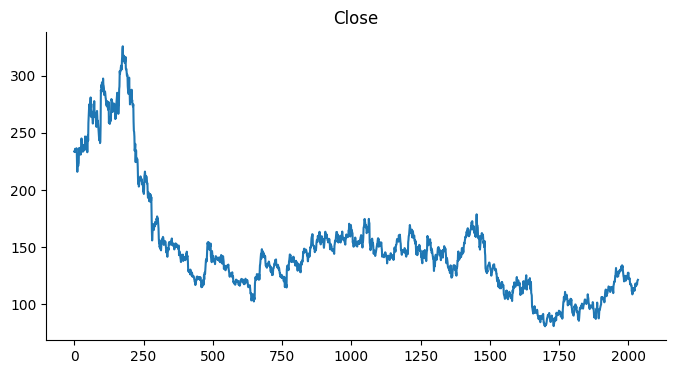

In [ ]:
# @title Last

from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

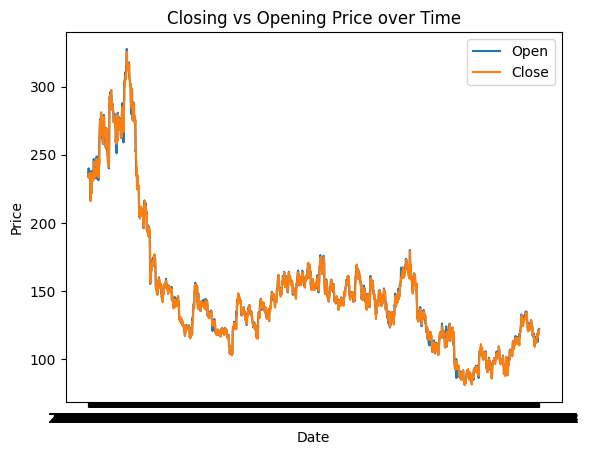

In [ ]:
# @title Closing vs Opening Price over Time

plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing vs Opening Price over Time')
_ = plt.legend()

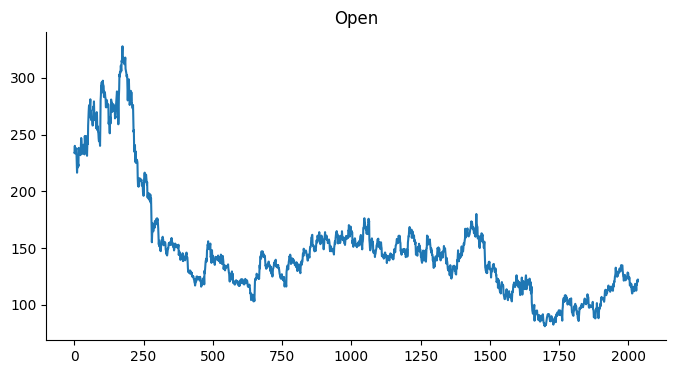

In [ ]:
# Open

data['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

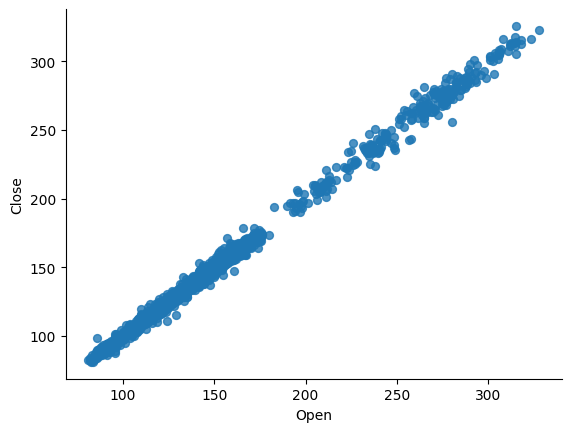

In [ ]:
#  Last vs Close

data.plot(kind='scatter', x='Open', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.shape

(2035, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
#Missing values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

No missing values

In [ ]:
#Duplicated
data.duplicated().sum()

0

No duplicates

In [ ]:
#Descriptive Statistics
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


We see different dimensions in the data, we will scale them

In [ ]:
# Converting 'Date' Column to Time Series Format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## Feature Selection

In [ ]:
X = data.drop(columns=['Date', 'Close'])
y = data['Close']

In [ ]:
# correlation
X.corr()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.399328,0.624584
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.926931,1.000000


<Axes: >

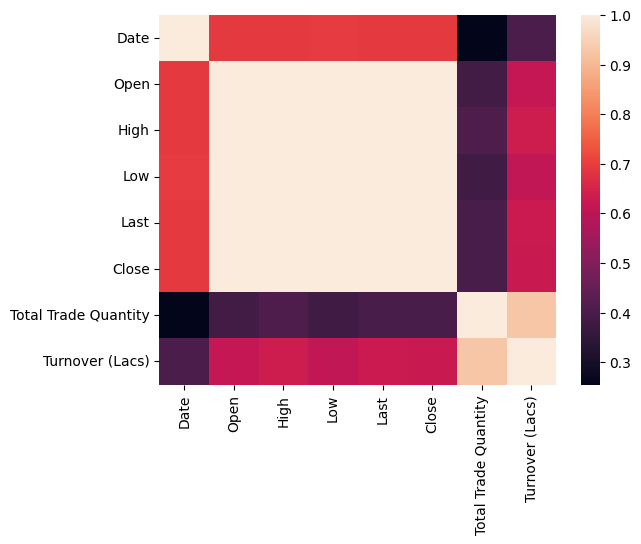

In [ ]:
#Heat map
sns.heatmap(X.corr())

## Scaling

In [ ]:
scaler = MinMaxScaler()

# Applying normalization to the data (excluding the date column)
scaled_X = scaler.fit_transform(X)

In [ ]:
scaled_X

array([[0.6202352 , 0.62268754, 0.62156011, 0.62257604, 0.10395053,
        0.12788156],
       [0.62226277, 0.62614353, 0.6252845 , 0.62380078, 0.17300192,
        0.21219178],
       [0.64436334, 0.6391543 , 0.63107801, 0.62869973, 0.07551262,
        0.09353452],
       ...,
       [0.16504461, 0.15917869, 0.16656321, 0.16064503, 0.00829126,
        0.00544294],
       [0.15896188, 0.15938199, 0.16656321, 0.16227802, 0.00870291,
        0.00570964],
       [0.16626115, 0.16344786, 0.16987378, 0.16370688, 0.02123589,
        0.01375712]])

In [ ]:
columns = ['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)']

In [ ]:
scaled_df = pd.DataFrame(data=scaled_data, columns=columns)

In [ ]:
scaled_df['Date'] = data['Date']

In [ ]:
scaled_df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Date
0,0.620235,0.622688,0.621560,0.622576,0.624183,0.103951,0.127882,2018-09-28
1,0.622263,0.626144,0.625285,0.623801,0.622141,0.173002,0.212192,2018-09-27
2,0.644363,0.639154,0.631078,0.628700,0.626225,0.075513,0.093535,2018-09-26
3,0.617194,0.625940,0.629009,0.633803,0.633783,0.079233,0.098117,2018-09-25
4,0.618208,0.635902,0.623836,0.624617,0.622345,0.116080,0.142907,2018-09-24


## PCA

In [ ]:
#PCA initialization
pca = PCA()
pca.fit(scaled_X)

PCA()

In [ ]:
# Kaiser method: choosing the number of components that explain eigenvalues ​​>1
kaiser_components = len([eig_val for eig_val in pca.explained_variance_ if eig_val > 1])

# Total explained variance: choosing the number of components that explain 95% of the variance
cumulative_variance = 0
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    cumulative_variance += explained_variance
    if cumulative_variance >= 0.95:
        variance_components = i + 1
        break

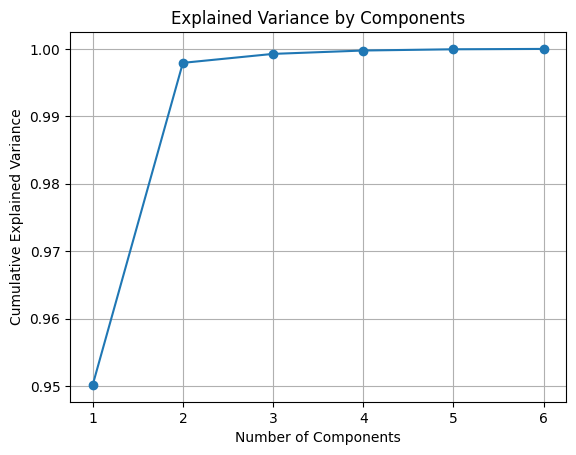

Number of components by Kaiser's rule: 0
Number of components explaining 95% variance: 1


In [ ]:
#Visualization of explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

print("Number of components by Kaiser's rule:", kaiser_components)
print("Number of components explaining 95% variance:", variance_components)

Number of components by Kaiser's rule: 0",
this means that none of the eigenvalues ​​exceed 1, and therefore the Kaiser method does not identify any principal components. In this case, we can only consider the number of components that explain 95% of the variance.

"Number of components explaining 95% variance: 1" indicates that it is sufficient to use only one principal component to explain 95% of the variance in the data. This means that we can only use one of the original features for prediction.

In [ ]:
# Using PCA to reduce the dimensionality of data to one principal component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(scaled_X)

In [ ]:
#train test division by date
#date for division will be in line 407 (80%/20%)
data.iloc[407]

Date                    2017-02-07 00:00:00
Open                                  142.1
High                                  145.8
Low                                   140.1
Last                                  141.9
Close                                141.65
Total Trade Quantity                2205918
Turnover (Lacs)                     3157.09
Name: 407, dtype: object

In [ ]:
split_date = '2017-02-07'

X_train = X_pca[data['Date'] < split_date]
y_train = y[data['Date'] < split_date]
X_test = X_pca[data['Date'] >= split_date]
y_test = y[data['Date'] >= split_date]

In [ ]:
#Preparing data for LSTM (3D array
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
#Initializing the Stacked LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Model training
model.fit(X_train, y_train, epochs=100, batch_size=32)

#Forecasting closing prices on a test data set
y_pred = model.predict(X_test)

#Model performance evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/100
51/51 [==============================] - 7s 8ms/step - loss: 17583.9082
Epoch 2/100
51/51 [==============================] - 1s 14ms/step - loss: 16698.6250
Epoch 3/100
51/51 [==============================] - 1s 13ms/step - loss: 14357.5449
Epoch 4/100
51/51 [==============================] - 1s 12ms/step - loss: 13306.1084
Epoch 5/100
51/51 [==============================] - 1s 13ms/step - loss: 12669.4404
Epoch 6/100
51/51 [==============================] - 1s 12ms/step - loss: 12108.8701
Epoch 7/100
51/51 [==============================] - 1s 12ms/step - loss: 11620.0986
Epoch 8/100
51/51 [==============================] - 1s 13ms/step - loss: 11189.4756
Epoch 9/100
51/51 [==============================] - 1s 10ms/step - loss: 10747.0977
Epoch 10/100
51/51 [==============================] - 0s 9ms/step - loss: 10351.3008
Epoch 11/100
51/51 [==============================] - 0s 9ms/step - loss: 9928.8047
Epoch 12/100
51/51 [==============================] - 0s 9ms/step -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5